<a href="https://colab.research.google.com/github/datadigger01/AI-Trade/blob/main/tr_ramen_trend_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글폰트 설치

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# 한글 폰트 설정 (나눔 글꼴)
plt.rcParams['font.family'] = 'NanumGothic' # 설치된 나눔고딕 폰트 이름으로 변경
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI와무역투자론/Data/kor_ramen_expratio_15_24.csv')
df

,statCd,statCdCntnKor1,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,AE,아랍에미리트 연합,0.297063,0.514908,0.885231,0.842657,1.0,1.292011,3.070706,4.669419,3.848955,5.264214
1,AR,아르헨티나,0.803359,0.859201,1.133428,0.714777,1.0,0.440939,0.977887,1.280813,1.314926,1.635435
2,AS,아메리칸 사모아,0.915454,0.893898,0.723542,0.936451,1.0,1.050419,1.078093,1.331739,1.350449,1.400715
3,AT,오스트리아,0.023609,0.499012,0.546826,0.640050,1.0,1.974748,2.235833,2.855892,3.567627,2.850775
4,AU,호주,0.498742,0.619457,0.765629,0.914837,1.0,1.116150,1.019058,1.266894,1.616778,1.964405
...,...,...,...,...,...,...,...,...,...,...,...,...
61,US,미국,0.522568,0.663936,0.788656,0.933396,1.0,1.463886,1.473678,1.292283,1.823116,2.810449
62,UZ,우즈베키스탄,0.371128,0.443814,0.633679,0.682504,1.0,1.701245,2.069903,4.145226,5.392641,9.725251
63,VN,베트남,0.164419,0.370421,0.827318,0.717700,1.0,0.926410,0.884660,0.831765,0.841077,0.981538
64,WS,사모아,0.550369,0.582683,0.631071,0.746453,1.0,0.825097,1.054338,0.835990,1.204340,0.961856


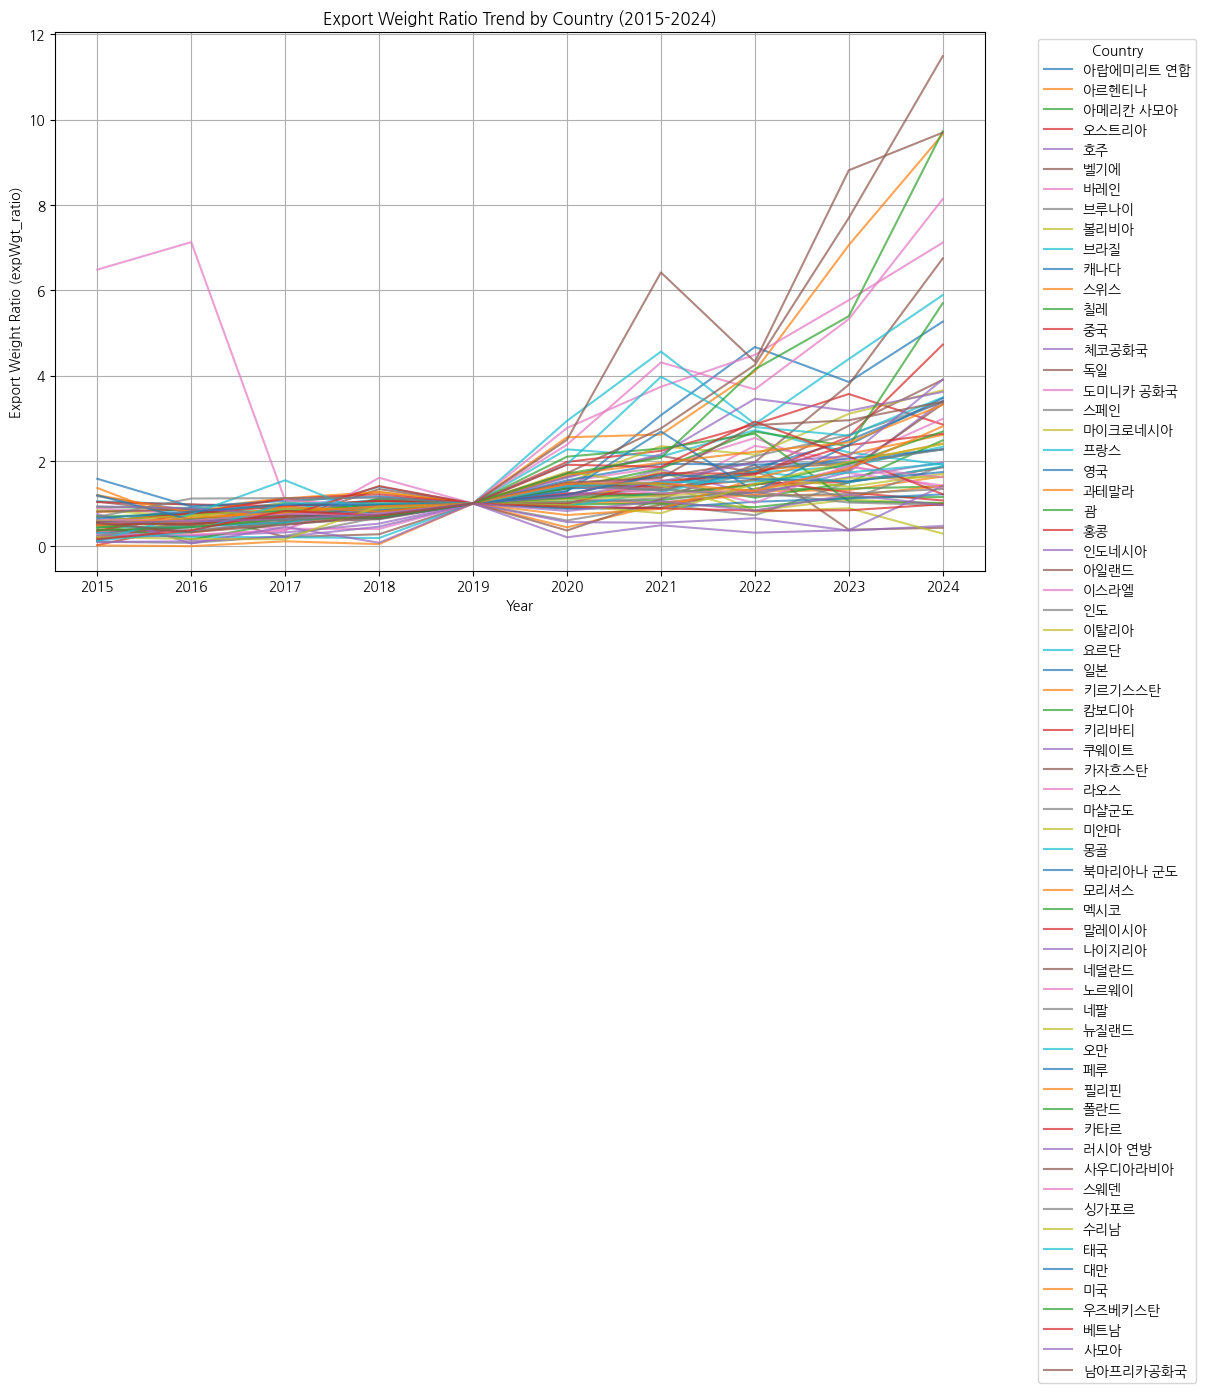

In [5]:
import matplotlib.pyplot as plt


# Define the columns representing the years
year_columns = [str(year) for year in range(2015, 2025)] # Convert years to strings to match column names in df

plt.figure(figsize=(12, 7))

# Plot a line for each country
for index, row in df.iterrows():
    plt.plot(year_columns, row[year_columns], label=row['statCdCntnKor1'], alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Export Weight Ratio (expWgt_ratio)')
plt.title('Export Weight Ratio Trend by Country (2015-2024)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
plt.show()

## Trend Clustering

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
#plt.style.use('seaborn-v0_8-darkgrid')
#sns.set_palette("husl")

In [9]:
# Prepare data for clustering
# Extract only the year columns (2015-2024) from df
year_columns = [str(year) for year in range(2015, 2025)] # Use strings as column names are strings

X = df[year_columns].values
country_names = df['statCdCntnKor1'].values # Use df for country names
#print(country_names)

# Handle missing values if any (fill with mean)
X = np.nan_to_num(X, nan=np.nanmean(X)) # Use np.nanmean to calculate mean while ignoring NaNs

In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

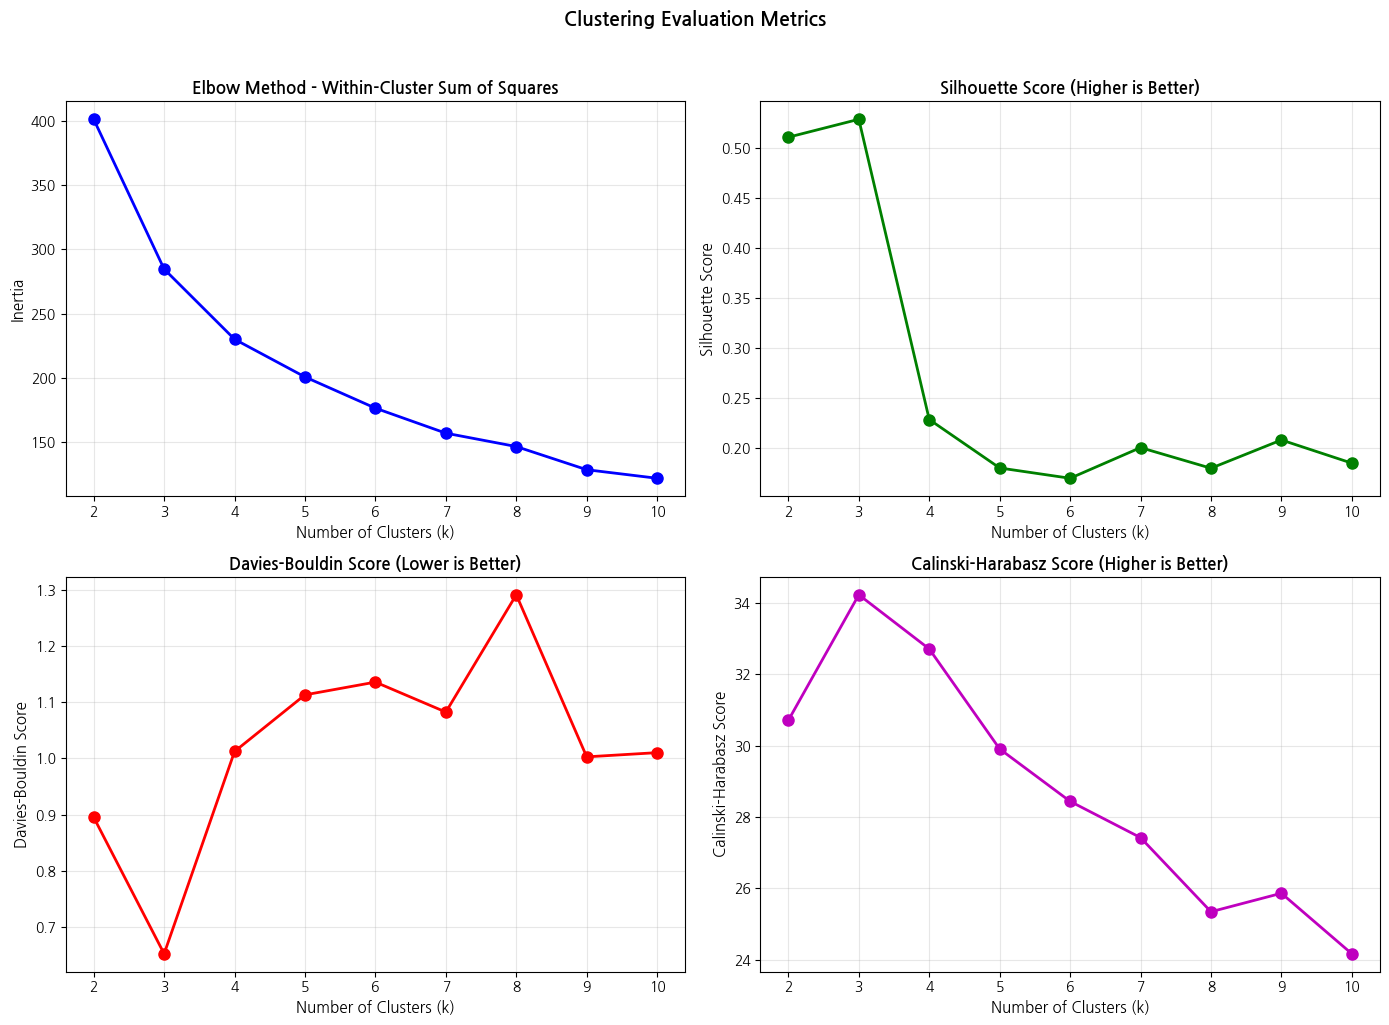

In [11]:
# Elbow Method
inertias = []
silhouette_scores = []
db_scores = []
ch_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

# Plot clustering metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Elbow plot
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0, 0].set_ylabel('Inertia', fontsize=11)
axes[0, 0].set_title('Elbow Method - Within-Cluster Sum of Squares', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette score
axes[0, 1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=11)
axes[0, 1].set_title('Silhouette Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin score
axes[1, 0].plot(K_range, db_scores, 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[1, 0].set_ylabel('Davies-Bouldin Score', fontsize=11)
axes[1, 0].set_title('Davies-Bouldin Score (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz score
axes[1, 1].plot(K_range, ch_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=11)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Clustering Evaluation Metrics', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
# Print scores
print("\nClustering Evaluation Scores:")
print("-"*60)
print(f"{'k':<5} {'Silhouette':<12} {'Davies-Bouldin':<15} {'Calinski-Harabasz':<18}")
print("-"*60)
for i, k in enumerate(K_range):
    print(f"{k:<5} {silhouette_scores[i]:<12.4f} {db_scores[i]:<15.4f} {ch_scores[i]:<18.2f}")

# Determine optimal k (using silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")


Clustering Evaluation Scores:
------------------------------------------------------------
k     Silhouette   Davies-Bouldin  Calinski-Harabasz 
------------------------------------------------------------
2     0.5105       0.8952          30.71             
3     0.5284       0.6524          34.24             
4     0.2281       1.0124          32.72             
5     0.1797       1.1131          29.91             
6     0.1694       1.1358          28.44             
7     0.2000       1.0825          27.42             
8     0.1794       1.2912          25.34             
9     0.2077       1.0028          25.86             
10    0.1845       1.0103          24.16             

Optimal number of clusters based on Silhouette Score: 3


In [14]:
# Perform K-means with optimal k
#kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters


CLUSTER CHARACTERISTICS

CLUSTER 0 (39 countries)
Countries: 아르헨티나, 아메리칸 사모아, 오스트리아, 호주, 바레인, 브루나이, 볼리비아, 브라질, 캐나다, 칠레
          ... and 29 more

Statistics (in tons):
  Average 2024 export: 3
  Total 2024 export: 98
  Average growth (2015-2024): 299.4%

CLUSTER 1 (8 countries)
Countries: 아랍에미리트 연합, 이스라엘, 요르단, 키르기스스탄, 라오스, 네덜란드, 우즈베키스탄, 남아프리카공화국

Statistics (in tons):
  Average 2024 export: 8
  Total 2024 export: 67
  Average growth (2015-2024): 1625.1%

CLUSTER 2 (18 countries)
Countries: 벨기에, 스위스, 중국, 체코공화국, 과테말라, 인도네시아, 인도, 쿠웨이트, 카자흐스탄, 마샬군도
          ... and 8 more

Statistics (in tons):
  Average 2024 export: 2
  Total 2024 export: 34
  Average growth (2015-2024): 383.5%

CLUSTER 3 (1 countries)
Countries: 노르웨이

Statistics (in tons):
  Average 2024 export: 1
  Total 2024 export: 1
  Average growth (2015-2024): -79.2%
Y-axis range fixed to: [-0.0, 0.0] (1000 tons)


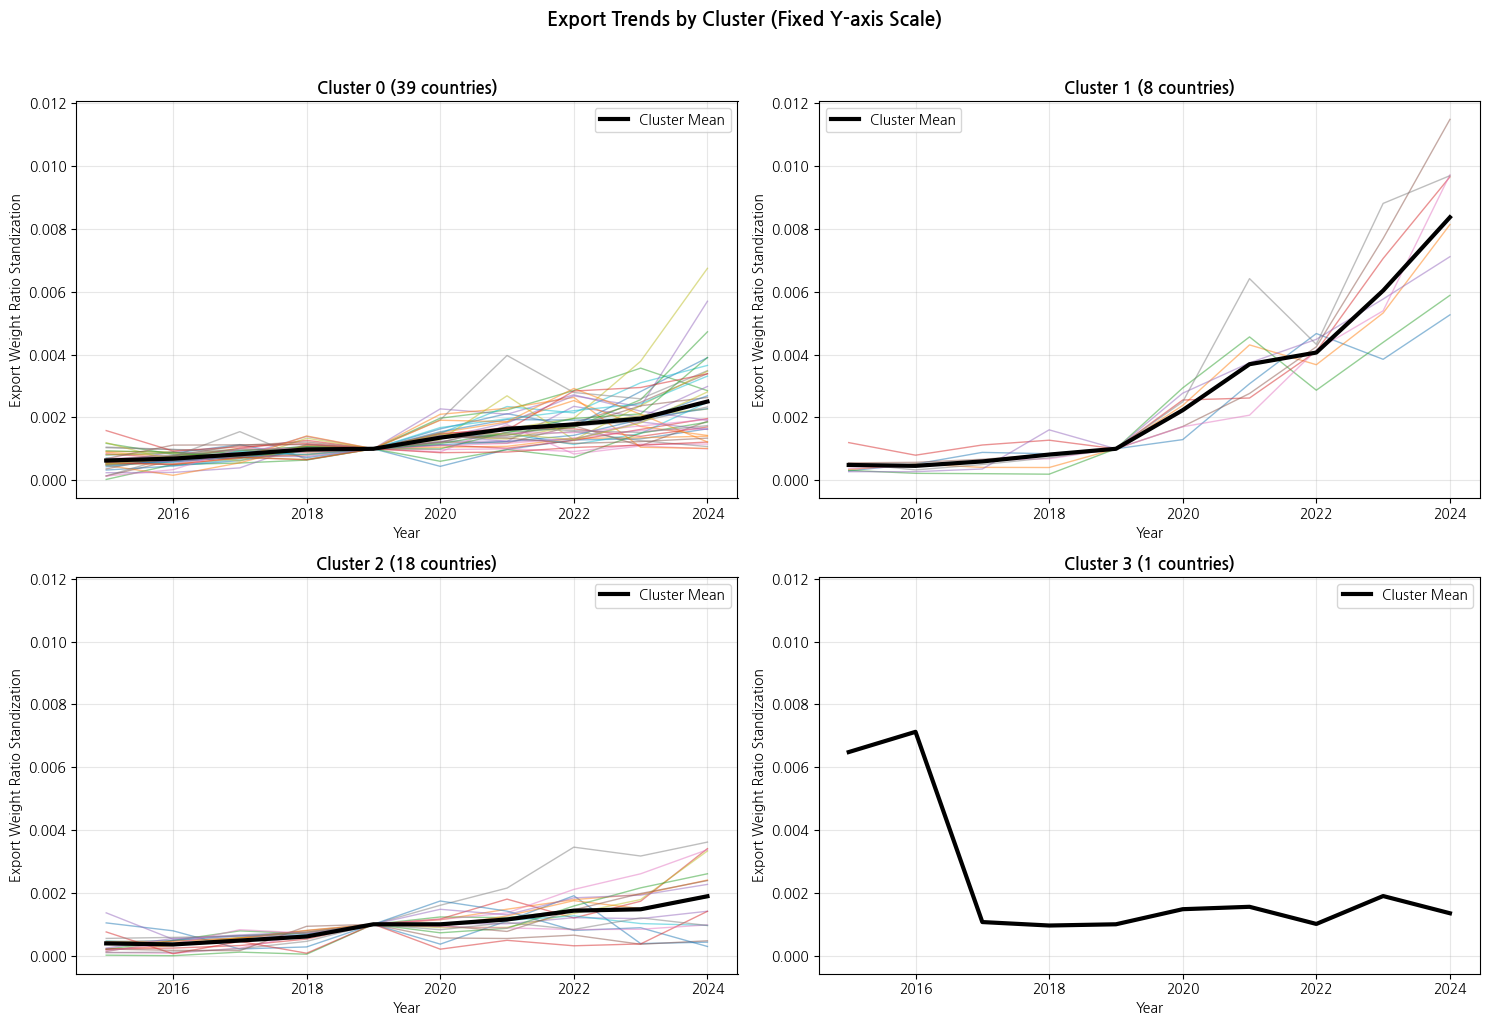

In [18]:
# ============================================================
# 4. CLUSTER ANALYSIS
# ============================================================

print("\n" + "="*80)
print("CLUSTER CHARACTERISTICS")
print("="*80)

#for cluster_id in range(optimal_k):
for cluster_id in range(4):

    cluster_mask = df['cluster'] == cluster_id
    cluster_countries = df[cluster_mask]['statCdCntnKor1'].values
    cluster_data = X[cluster_mask]

    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id} ({len(cluster_countries)} countries)")
    print(f"{'='*60}")
    print(f"Countries: {', '.join(cluster_countries[:10])}")
    if len(cluster_countries) > 10:
        print(f"          ... and {len(cluster_countries)-10} more")

    print(f"\nStatistics (in tons):")
    print(f"  Average 2024 export: {cluster_data[:, -1].mean():,.0f}")
    print(f"  Total 2024 export: {cluster_data[:, -1].sum():,.0f}")
    print(f"  Average growth (2015-2024): {((cluster_data[:, -1].mean() / (cluster_data[:, 0].mean() + 1e-10)) - 1) * 100:.1f}%")

# ============================================================
# 6. TIME SERIES VISUALIZATION BY CLUSTER
# ============================================================

# Plot time series for each cluster
fig, axes = plt.subplots(2, (optimal_k + 1) // 2, figsize=(15, 10))
#fig, axes = plt.subplots(2, (4 + 1) // 2, figsize=(15, 10))
axes = axes.flatten()

years = list(range(2015, 2025))

# Calculate global min and max for Y-axis to ensure all plots have same scale
all_data_in_thousands = X / 1000
global_min = all_data_in_thousands.min()
global_max = all_data_in_thousands.max()

# Add some padding (5% on each side) for better visualization
y_padding = (global_max - global_min) * 0.05
y_min = global_min - y_padding
y_max = global_max + y_padding

print(f"Y-axis range fixed to: [{y_min:.1f}, {y_max:.1f}] (1000 tons)")

#for cluster_id in range(optimal_k):
for cluster_id in range(4):
    ax = axes[cluster_id]
    cluster_mask = df['cluster'] == cluster_id
    cluster_data = X[cluster_mask]

    # Plot each country in the cluster
    for i, country_data in enumerate(cluster_data):
        ax.plot(years, country_data / 1000, alpha=0.5, linewidth=1)

    # Plot cluster mean
    cluster_mean = cluster_data.mean(axis=0) / 1000
    ax.plot(years, cluster_mean, 'k-', linewidth=3, label='Cluster Mean')

    ax.set_title(f'Cluster {cluster_id} ({sum(cluster_mask)} countries)', fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Export Weight Ratio Standization')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Set the same Y-axis limits for all subplots
    ax.set_ylim(y_min, y_max)

# Remove extra subplots if odd number of clusters
#for i in range(optimal_k, len(axes)):
for i in range(4, len(axes)):

    fig.delaxes(axes[i])

plt.suptitle('Export Trends by Cluster (Fixed Y-axis Scale)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


PCA explained variance ratio: [0.45209906 0.24797921]
Total variance explained: 70.01%


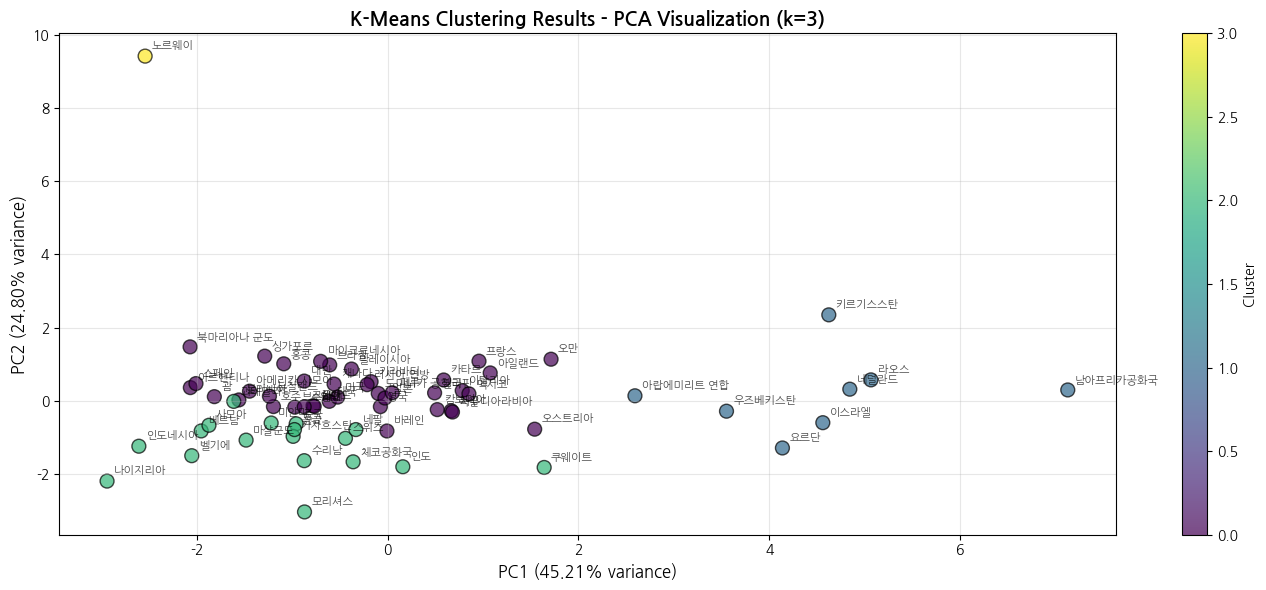

In [15]:
# ============================================================
# 3. PCA VISUALIZATION
# ============================================================

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

# Plot PCA visualization
plt.figure(figsize=(14, 6))

# Create scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis',
                     s=100, alpha=0.7, edgecolors='black', linewidth=1)

# Add country labels
for i, country in enumerate(country_names):
    plt.annotate(country, (X_pca[i, 0], X_pca[i, 1]),
                fontsize=8, alpha=0.7,
                xytext=(5, 5), textcoords='offset points')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title(f'K-Means Clustering Results - PCA Visualization (k={optimal_k})', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()